# Relatorio de Análise 

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import re

In [2]:
pd.read_csv('DesafioDados/DesafioEstagioMachineLearning.csv')

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,...,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,...,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,...,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,3304557065,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,...,0,87,556,836,940,484,75,214,2418.0,921875.0


In [3]:
dados = pd.read_csv('DesafioDados/DesafioEstagioMachineLearning.csv')

In [4]:
dados_bairro = pd.DataFrame(dados, columns = ['nome','população','domiciliosA1','domiciliosA2','domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE','faturamento'])

In [5]:
maior_faturamento = (dados_bairro.sort_values(by=['faturamento'],ascending=False))
maior_faturamento

,nome,população,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,faturamento
9,Barra Da Tijuca,139761,13408,11668,14820,5205,3437,1841,0,3897,2915612.0
36,Copacabana,150524,5740,9218,19350,13160,10982,5482,998,5122,2384494.0
15,Botafogo,85229,3669,5165,11669,6106,5289,3009,371,1853,2211985.0
141,Tijuca,168267,4351,8306,19076,11631,10755,6539,1280,3723,2157079.0
82,Leblon,47342,5423,3532,5342,1863,1890,917,217,1595,2119774.0
...,...,...,...,...,...,...,...,...,...,...,...
62,Guaratiba,112994,0,0,1429,4066,9306,11066,2289,7258,69304.0
125,Rocinha,71315,0,0,149,2298,6761,8969,1402,5242,59273.0
127,Santa Cruz,223440,0,0,2057,8310,18161,22160,4572,14833,43346.0
8,Bangu,249987,0,496,5246,13274,24363,22447,4564,11109,35465.0


# Podemos observar que os bairros sao possivelmente os que tem mais faturamento.

In [6]:
display(dados_bairro.iloc[9])

nome            Barra Da Tijuca
população                139761
domiciliosA1              13408
domiciliosA2              11668
domiciliosB1              14820
domiciliosB2               5205
domiciliosC1               3437
domiciliosC2               1841
domiciliosD                   0
domiciliosE                3897
faturamento           2915612.0
Name: 9, dtype: object

In [7]:
lista_publico =pd.DataFrame(dados, columns = ['nome','população','popAte9','popDe10a14','popDe15a19', 'popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60','rendaMedia','faturamento'])
lista_publico = (lista_publico.sort_values(by=['faturamento'],ascending=False))

lista =[lista_publico.popAte9.sum(),
        lista_publico.popDe10a14.sum(),
        lista_publico.popDe15a19.sum(),
        lista_publico.popDe20a24.sum(),
        lista_publico.popDe25a34.sum(),
        lista_publico.popDe35a49.sum(),
        lista_publico.popDe50a59.sum(),
        lista_publico.popMaisDe60.sum()]
for x in lista:
    print(x)
lista_publico.popDe35a49.sum()
 


852650
397511
523545
535901
1053516
1412298
853162
1196113


1412298

### Podemos dizer que o publico alvo PODE ser de 35 a 49 e que tudo indica que as regiões de classes mais altas temos um faturamento maior

### . Agora devemos criar um modelo de regressão capaz de prever o faturamento em novos bairros, caso o cliente queira realizar um projeto de expansão.

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [9]:
df = pd.read_csv('DesafioDados/DesafioEstagioMachineLearning.csv')
df = df.dropna()

In [10]:
df_ = (df.sort_values(by=['faturamento'],ascending=False))
df_

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
9,3304557131,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,...,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
36,3304557018,Copacabana,Rio de Janeiro,RJ,150524,8562,3727,6383,9168,21814,...,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0
15,3304557014,Botafogo,Rio de Janeiro,RJ,85229,6278,2608,4410,5911,14697,...,3669,5165,11669,6106,5289,3009,371,1853,8316.0,2211985.0
141,3304557030,Tijuca,Rio de Janeiro,RJ,168267,13033,6405,9750,10968,23657,...,4351,8306,19076,11631,10755,6539,1280,3723,7844.0,2157079.0
82,3304557020,Leblon,Rio de Janeiro,RJ,47342,3134,1380,2131,2390,6177,...,5423,3532,5342,1863,1890,917,217,1595,14738.0,2119774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,3304557142,Guaratiba,Rio de Janeiro,RJ,112994,18088,8474,10307,9069,18732,...,0,0,1429,4066,9306,11066,2289,7258,1237.0,69304.0
125,3304557156,Rocinha,Rio de Janeiro,RJ,71315,11817,4576,6527,7855,14629,...,0,0,149,2298,6761,8969,1402,5242,1037.0,59273.0
127,3304557107,Santa Cruz,Rio de Janeiro,RJ,223440,35572,16403,20998,18090,34697,...,0,0,2057,8310,18161,22160,4572,14833,1188.0,43346.0
8,3304557099,Bangu,Rio de Janeiro,RJ,249987,32651,15949,20926,20146,37750,...,0,496,5246,13274,24363,22447,4564,11109,1550.0,35465.0


c:\users\srcal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='faturamento', ylabel='Faturamento(Por bairro)'>

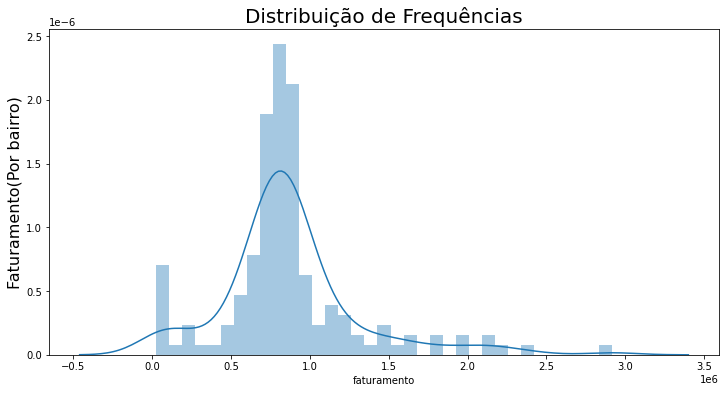

In [11]:
ax = sns.distplot(df['faturamento'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Faturamento(Por bairro)', fontsize=16)
ax


###  Na linha de baixo eu puxei todos os graficos, mas como demora para fazer tudo eu deixei como comentario.

In [12]:
# ax = sns.pairplot(df)

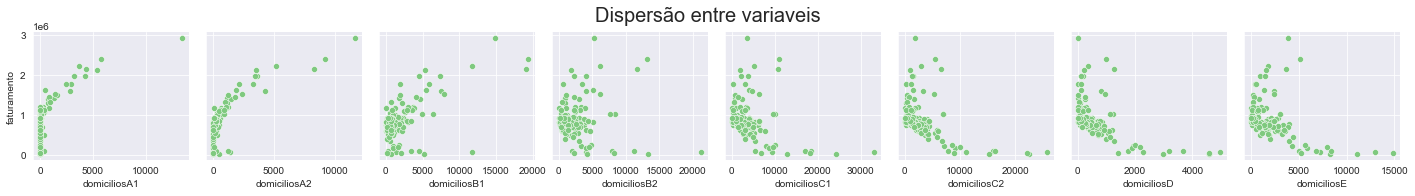

In [13]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

ax = sns.pairplot(df,y_vars='faturamento', x_vars=['domiciliosA1','domiciliosA2','domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD',
                                                   'domiciliosE'])
ax.fig.suptitle('Dispersão entre variaveis', fontsize=20, y=1.05)
ax

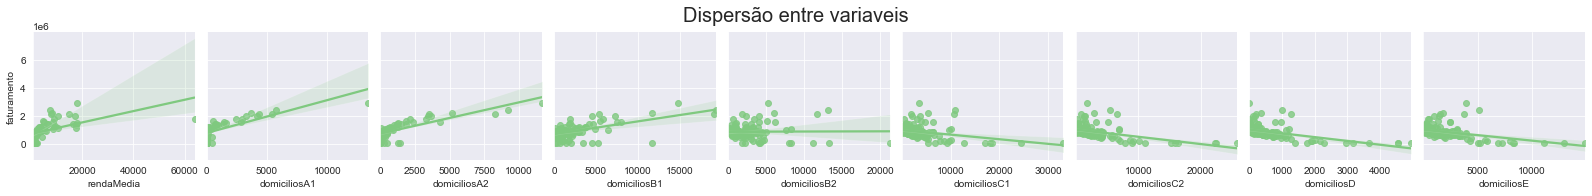

In [14]:
ax = sns.pairplot(df,y_vars='faturamento', x_vars=['rendaMedia','domiciliosA1','domiciliosA2','domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD',
                                                   'domiciliosE'], kind='reg')
ax.fig.suptitle('Dispersão entre variaveis', fontsize=20, y=1.05)
ax

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics


In [16]:
y = df['faturamento']
X = df[['rendaMedia','domiciliosA1','domiciliosA2','domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 5000)

modelo = LinearRegression()
modelo.fit(X_train, y_train)



LinearRegression()

In [17]:
X_train.shape, y_train.shape

((107, 9), (107,))

In [18]:
X_test.shape, y_test.shape

((47, 9), (47,))

In [19]:

print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.95


In [20]:
y_previsto=modelo.predict(X_test)
print('R²= %s' % metrics.r2_score(y_test, y_previsto).round(2))

R²= 0.89


### Obtendo Previsões Pontuais

In [21]:
entrada = X_test[0:1]
entrada


,rendaMedia,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
27,1499.0,0,0,335,988,1755,1384,329,794


In [22]:
print('{0:.2f} faturamento'.format(modelo.predict(entrada)[0]))

796303.41 faturamento


### Nas condições testadas o modelo prever um faturamento de 796303.41 faturamento naquele bairro

### Entao podemos fazer  um simulador simples

In [23]:
rendaMedia=7381.0
domiciliosA1=5740
domiciliosA2=11668
domiciliosB1=19350
domiciliosB2=13160
domiciliosC1=10982
domiciliosC2=5482
domiciliosD=998
domiciliosE=5122
entrada=[[rendaMedia,domiciliosA1,domiciliosA2, domiciliosB1, domiciliosB2,
          domiciliosC1, domiciliosC2,	domiciliosD,domiciliosE]]
print('Provavelmente tera um faturamento de {0:.2f} nesse bairro'.format(modelo.predict(entrada)[0]))

Provavelmente tera um faturamento de 2490705.82 nesse bairro


In [24]:
modelo.intercept_

849597.1336512465

In [25]:
type(modelo.intercept_)

numpy.float64

In [26]:
modelo.coef_

array([ 12.4194915 , 123.63090134, -83.46908579,  92.8507901 ,
        78.58588643, -61.71917434, -30.3054333 , -20.36307218,
       -29.8477184 ])

In [27]:
X.columns

Index(['rendaMedia', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1',
       'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD',
       'domiciliosE'],
      dtype='object')

In [28]:
index=['Intercepto','rendaMedia', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1',
       'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD',
       'domiciliosE']

#### O intercepto representa o efeito médio em Y (variável dependente), tendo todas as variáveis explicativas excluídas do modelo

In [29]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=["Parametros"])

,Parametros
Intercepto,849597.133651
rendaMedia,12.419492
domiciliosA1,123.630901
domiciliosA2,-83.469086
domiciliosB1,92.850790
domiciliosB2,78.585886
domiciliosC1,-61.719174
domiciliosC2,-30.305433
domiciliosD,-20.363072
domiciliosE,-29.847718


### Com isso temos mais certeza que a influencia da renda e dos domicilios de classe mais alta, tem uma influencia direta no aumento do faturamento, ja os domicilios de C1,C2,D e E tem uma relaçao inversamente proporcional  ao Faturamento. (OBS: A2 tambem gera queda do faturamento, talvez uma analise mais  minuciosa explicaria o motivo).

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Faturamento(Por bairro) - Previsão', ylabel='Faturamento(Por bairro) - Real'>

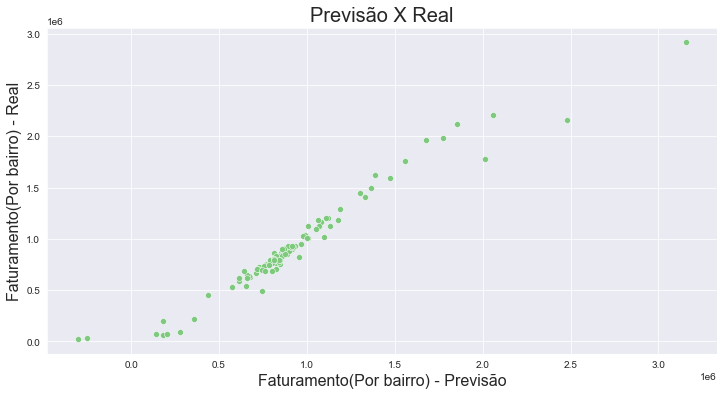

In [55]:
y_previsto_train = modelo.predict(X_train)
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=20)
ax.set_xlabel('Faturamento(Por bairro) - Previsão', fontsize=16)
ax.set_ylabel('Faturamento(Por bairro) - Real', fontsize=16)
ax

In [31]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':' Residuo X Previsão'}, xlabel='Faturamento(Por bairro) - Previsão)', ylabel='Residuo'>

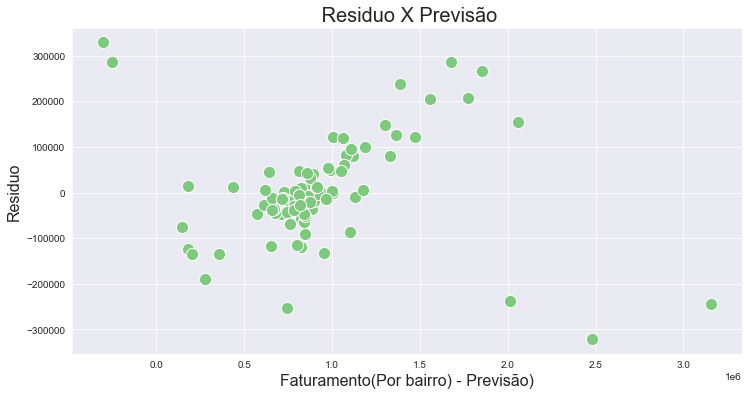

In [32]:
y_previsto_train = modelo.predict(X_train)
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title(' Residuo X Previsão', fontsize=20)
ax.set_xlabel('Faturamento(Por bairro) - Previsão)', fontsize=16)
ax.set_ylabel('Residuo', fontsize=16)
ax

<AxesSubplot:title={'center':' Residuo X Previsão'}, xlabel='Faturamento(Por bairro) - Previsão)', ylabel='Residuo'>

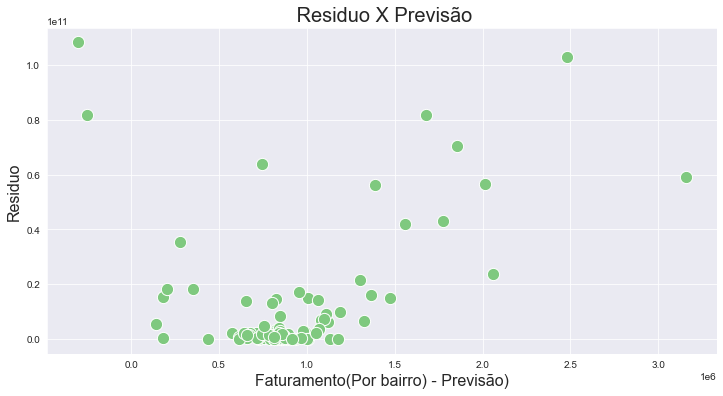

In [33]:
y_previsto_train = modelo.predict(X_train)
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title(' Residuo X Previsão', fontsize=20)
ax.set_xlabel('Faturamento(Por bairro) - Previsão)', fontsize=16)
ax.set_ylabel('Residuo', fontsize=16)
ax

c:\users\srcal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Residuos'}, xlabel='faturamento', ylabel='Faturamento'>

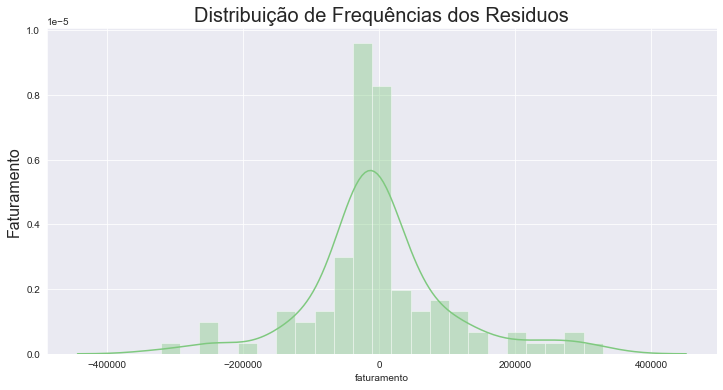

In [34]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Residuos', fontsize=20)
ax.set_ylabel('Faturamento', fontsize=16)
ax

In [59]:
entrada = X_test[0:1]
entrada

rendaMedia=7381.0
domiciliosA1=5740
domiciliosA2=5168
domiciliosB1=19350
domiciliosB2=13160
domiciliosC1=10982
domiciliosC2=5482
domiciliosD=9983
domiciliosE=5122
entrada=[[rendaMedia,domiciliosA1,domiciliosA2, domiciliosB1, domiciliosB2,
          domiciliosC1, domiciliosC2,	domiciliosD,domiciliosE]]
print('Provavelmente tera um faturamento de {0:.2f} nesse bairro'.format(modelo.predict(entrada)[0]))

Provavelmente tera um faturamento de 2850292.67 nesse bairro


In [36]:

import pickle

In [37]:
output = open('modelo_faturamento','wb')
pickle.dump(modelo, output)
output.close()